In [2]:
import pandas as pd

a = pd.read_csv("./data/archive/Disney Plus/Revenue.csv")
type(a.iloc[0,0])
a.iloc[0,0].split()[1]

'2020'

In [3]:
disney = pd.read_csv("./data/DisneyPlus.csv")
disney

,Year,Revenue,subscribers
0,Q1 2020,442,26.5
1,Q2 2020,565,33.5
2,Q3 2020,796,57.5
3,Q4 2020,999,73.3
4,Q1 2021,1147,94.9
5,Q2 2021,1240,103.6
6,Q3 2021,1447,116.0
7,Q4 2021,1459,118.1
8,Q1 2022,1717,129.8
9,Q2 2022,1796,137.7


In [4]:
netflix = pd.read_csv("./data/Netflix.csv")

i = 10
netflix.iloc[i*4:i*4+4]

,Year,Revenue,subscribers
40,Q1 2022,7868,222.0
41,Q2 2022,7970,220.6


In [5]:
hulu = pd.read_csv("./data/Hulu.csv")
hulu

,Year,Revenue,subscribers
0,Q1 2019,1183,22.8
1,Q2 2019,1201,25.2
2,Q3 2019,1363,27.9
3,Q4 2019,1595,28.5
4,Q1 2020,1643,30.4
5,Q2 2020,1712,32.1
6,Q3 2020,1791,35.5
7,Q4 2020,2111,36.6
8,Q1 2021,2336,39.4
9,Q2 2021,2302,41.6


In [44]:
netflix_rev = netflix[['Year', 'Revenue']]
netflix_rev.rename( columns={'Revenue':'Netflix'}, inplace=True)
hulu_rev = hulu[['Year', 'Revenue']]
hulu_rev.rename( columns={'Revenue':'Hulu'}, inplace=True)
disney_rev = disney[['Year', 'Revenue']]
disney_rev.rename( columns={'Revenue':'DisneyPlus'}, inplace=True)


revenue = pd.merge(netflix_rev, hulu_rev, how="outer", on='Year')
revenue = pd.merge(revenue, disney_rev, how="outer", on='Year')
# revenue = revenue.drop(42, axis=0)
revenue = revenue[24:42]
revenue

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21000\60153940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_rev.rename( columns={'Revenue':'Netflix'}, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21000\60153940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_rev.rename( columns={'Revenue':'Hulu'}, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21000\60153940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Year,Netflix,Hulu,DisneyPlus
24,Q1 2018,3701.0,NaN,NaN
25,Q2 2018,3907.0,NaN,NaN
26,Q3 2018,3999.0,NaN,NaN
27,Q4 2018,4187.0,NaN,NaN
28,Q1 2019,4521.0,1183.0,NaN
29,Q2 2019,4923.0,1201.0,NaN
30,Q3 2019,5245.0,1363.0,NaN
31,Q4 2019,5467.0,1595.0,NaN
32,Q1 2020,5768.0,1643.0,442.0
33,Q2 2020,6148.0,1712.0,565.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21000\1742425644.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')    # 글씨 선명하게


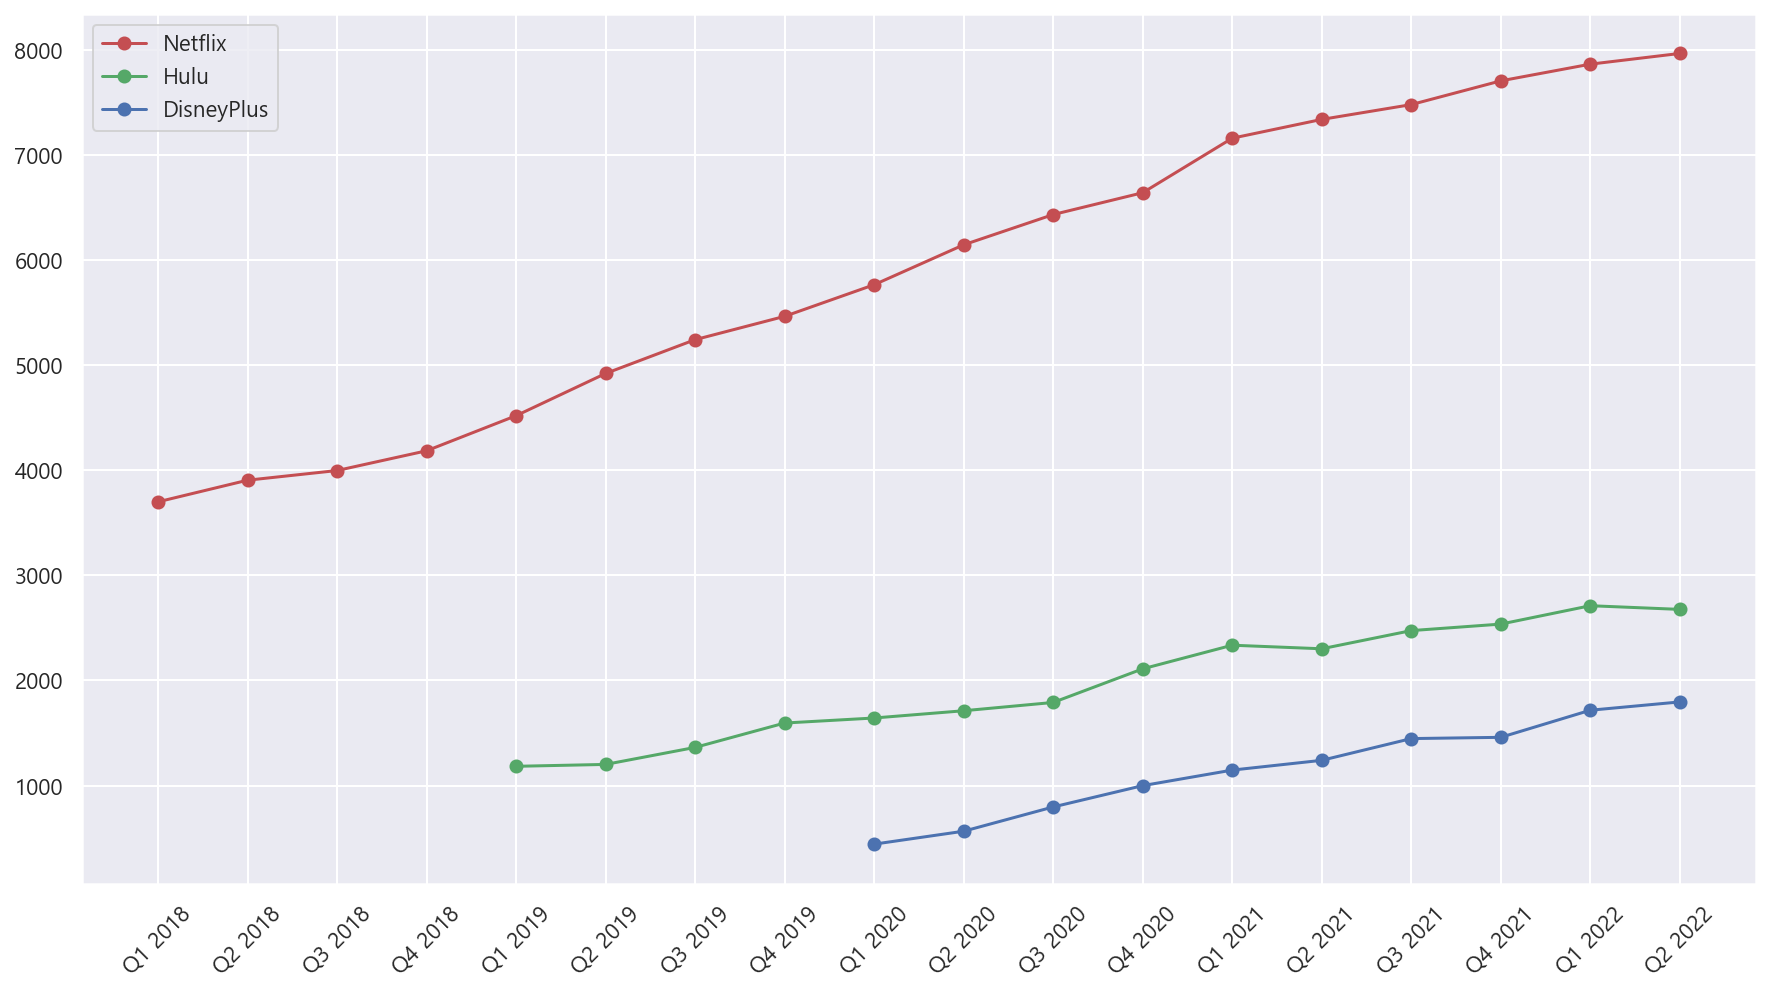

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')    # 글씨 선명하게


# 한글 폰트 설정 전에 스타일을 지정해야한다.
sns.set(color_codes=True)
sns.set_style('darkgrid')

###### 차트에 환경설정 : 한글 폰트 지정하기
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

x = revenue.loc[:,"Year"]

plt.plot(x, revenue.loc[:,"Netflix"], label='Netflix', color='r', marker='o') 
plt.plot(x, revenue.loc[:,"Hulu"], label='Hulu', color='g', marker='o') 
plt.plot(x, revenue.loc[:,"DisneyPlus"], label='DisneyPlus', color='b', marker='o')  

plt.rcParams['figure.figsize'] = [15, 8] # [width, height] (inches)
plt.xticks(rotation=45)

plt.legend(loc="best") 

plt.show()

In [46]:
netflix_sub = netflix[['Year', 'subscribers']]
netflix_sub.rename( columns={'subscribers':'Netflix'}, inplace=True)
hulu_sub = hulu[['Year', 'subscribers']]
hulu_sub.rename( columns={'subscribers':'Hulu'}, inplace=True)
disney_sub = disney[['Year', 'subscribers']]
disney_sub.rename( columns={'subscribers':'DisneyPlus'}, inplace=True)


subscribers = pd.merge(netflix_sub, hulu_sub, how="outer", on='Year')
subscribers = pd.merge(subscribers, disney_sub, how="outer", on='Year')
# subscribers = subscribers.drop(42, axis=0)
subscribers = subscribers[24:42]
subscribers


netflix_rev = netflix[['Year', 'Revenue']]
netflix_rev.rename( columns={'Revenue':'Netflix'}, inplace=True)
hulu_rev = hulu[['Year', 'Revenue']]
hulu_rev.rename( columns={'Revenue':'Hulu'}, inplace=True)
disney_rev = disney[['Year', 'Revenue']]
disney_rev.rename( columns={'Revenue':'DisneyPlus'}, inplace=True)


revenue = pd.merge(netflix_rev, hulu_rev, how="outer", on='Year')
revenue = pd.merge(revenue, disney_rev, how="outer", on='Year')
# revenue = revenue.drop(42, axis=0)
revenue = revenue[24:42]
revenue

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21000\2015220440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_sub.rename( columns={'subscribers':'Netflix'}, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21000\2015220440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_sub.rename( columns={'subscribers':'Hulu'}, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21000\2015220440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,Year,Netflix,Hulu,DisneyPlus
24,Q1 2018,118.90,NaN,NaN
25,Q2 2018,124.35,NaN,NaN
26,Q3 2018,130.42,NaN,NaN
27,Q4 2018,139.26,NaN,NaN
28,Q1 2019,148.86,22.8,NaN
29,Q2 2019,151.56,25.2,NaN
30,Q3 2019,158.33,27.9,NaN
31,Q4 2019,167.09,28.5,NaN
32,Q1 2020,182.86,30.4,26.5
33,Q2 2020,192.95,32.1,33.5


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21000\943581013.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')    # 글씨 선명하게


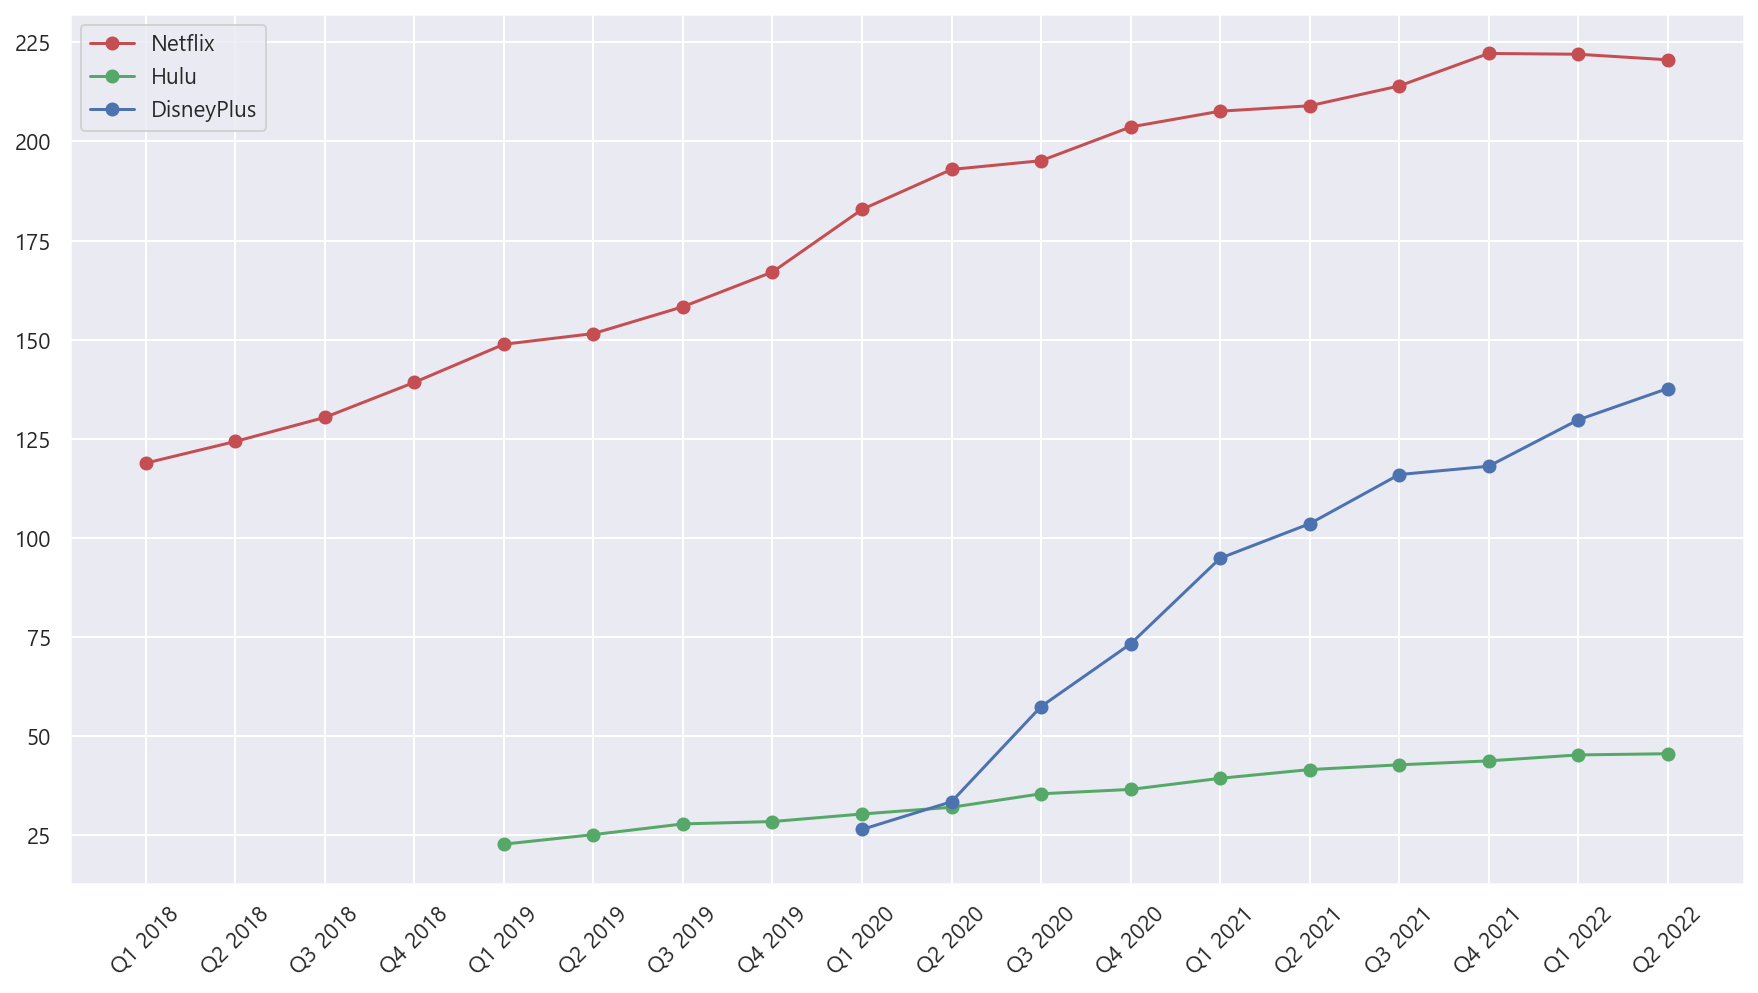

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')    # 글씨 선명하게


# 한글 폰트 설정 전에 스타일을 지정해야한다.
sns.set(color_codes=True)
sns.set_style('darkgrid')

###### 차트에 환경설정 : 한글 폰트 지정하기
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

x = subscribers.loc[:,"Year"]

plt.plot(x, subscribers.loc[:,"Netflix"], label='Netflix', color='r', marker='o') 
plt.plot(x, subscribers.loc[:,"Hulu"], label='Hulu', color='g', marker='o') 
plt.plot(x, subscribers.loc[:,"DisneyPlus"], label='DisneyPlus', color='b', marker='o')  

plt.rcParams['figure.figsize'] = [15, 8] # [width, height] (inches)
plt.xticks(rotation=45)

plt.legend(loc="best") 

plt.show()